In [1]:
import numpy as np
import skimage.io

from matplotlib import pyplot as plt

from skimage import img_as_ubyte

def plot_hist(img):
    fig = plt.figure()
    img = img_as_ubyte(img)
    histo, _ = np.histogram(img, range(0, 256), density = True)
    plt.plot(histo)
    plt.xlim(0, 255)

def plot_images(imgs: list[np.ndarray], column_count = 3):
    row_count = int(len(imgs) / column_count)
    # fig, axes = plt.subplots(row_count, column_count, sharex = True, sharey = True, **{ "figsize": (90, 90) })
    fig = plt.figure(figsize = (90, 90))
    for r in range(row_count):
        for c in range(column_count):
            index = r * column_count + c
            fig.add_subplot(row_count, column_count, index + 1)
            io.imshow(imgs[index])



In [2]:
def improve_contrast(img: np.ndarray):
    rows, columns, *_ = img.shape
    hist, _ = np.histogram(img, bins = 256)
    hist = [val for val in enumerate(hist)]
    hist.sort(key = lambda x: x[1])

    thresh = int(0.05 * rows * columns)
    whitened = []
    cov = 0

    for val, covers in hist:
        whitened.append(val)
        cov += covers
        if cov >= thresh:
            break

    # print(whitened)
    out = img
    for i in whitened:
        out[out == i] = 1
    return out

In [3]:
def invert(img):
    return 1.0 - img

In [4]:
def multiple_step_threshold(img, steps):
    step = 255 / steps
    _current = 0
    _next = _current + step

    out = img
    for i, row in enumerate(out):
        for j, col in enumerate(row):
            out[i, j] = int(out[i, j] * 255)

    for i in range(steps):
        if i < steps - 1:
            value = 0
        else:
            value = 255

        out[np.logical_and(out > _current, out <= _next)] = value

    return out

In [5]:
from itertools import chain

def threshold(img, variance = 5):
    diff = variance * 0.01
    highest = max([value for value in chain(*img)]) - diff
    out = np.array(img, copy = True)
    out[out > highest] = 1
    out[out <= highest] = 0
    return out

In [6]:
def normalize(img):
    low = min([value for value in chain(*img)])
    span = max([value for value in chain(*img)]) - low

    img = (img - low) / span

    return img

In [7]:
def gradient(img):
    horizontal = np.array(img, copy = True)
    vertical = np.array(img, copy = True)
    # first column of horizontal gradient has to be 0.
    horizontal[::1, 0] = 0.0
    for i, row in enumerate(img):
        for col in range(1, len(row)):
            dz = abs(row[col] - row[col - 1])
            horizontal[i, col] = dz

    # first row of vertical gradient has to be 0.
    vertical[0, ::1] = 0.0
    for row in range(1, len(img)):
        for col in range(len(img[row])):
            dz = abs(img[row, col] - img[row - 1, col])
            vertical[row, col] = dz

    return (horizontal, vertical)

import skimage.io as io

def desaturate(img):
    out = []
    for row in img:
        values = []
        for col in row:
            val = sum([*col]) / 765
            values.append(val)
        out.append(values)
    return np.array(out)

src = io.imread('gradient.png', as_gray = True)
# src = desaturate(src)
hor, ver = gradient(src)

for row in hor:
    print('[ ', end = '')
    for col in row:
        print("{:.2f}".format(col), end = ' ')
    print(']')

for row in ver:
    print('[ ', end = '')
    for col in row:
        print("{:.2f}".format(col), end = ' ')
    print(']')
# print(src)
# print(grad)


[ 0.00 0.20 0.20 0.20 0.20 0.20 0.00 0.20 0.20 0.20 0.20 0.20 ]
[ 0.00 0.20 0.20 0.20 0.20 0.20 0.00 0.20 0.20 0.20 0.20 0.20 ]
[ 0.00 0.20 0.20 0.20 0.20 0.20 0.00 0.20 0.20 0.20 0.20 0.20 ]
[ 0.00 0.20 0.20 0.20 0.20 0.20 0.00 0.20 0.20 0.20 0.20 0.20 ]
[ 0.00 0.20 0.20 0.20 0.20 0.20 0.00 0.20 0.20 0.20 0.20 0.20 ]
[ 0.00 0.20 0.20 0.20 0.20 0.20 0.00 0.20 0.20 0.20 0.20 0.20 ]
[ 0.00 0.20 0.20 0.20 0.20 0.20 0.00 0.20 0.20 0.20 0.20 0.20 ]
[ 0.00 0.20 0.20 0.20 0.20 0.20 0.00 0.20 0.20 0.20 0.20 0.20 ]
[ 0.00 0.20 0.20 0.20 0.20 0.20 0.00 0.20 0.20 0.20 0.20 0.20 ]
[ 0.00 0.20 0.20 0.20 0.20 0.20 0.00 0.20 0.20 0.20 0.20 0.20 ]
[ 0.00 0.20 0.20 0.20 0.20 0.20 0.00 0.20 0.20 0.20 0.20 0.20 ]
[ 0.00 0.20 0.20 0.20 0.20 0.20 0.00 0.20 0.20 0.20 0.20 0.20 ]
[ 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 ]
[ 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 ]
[ 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 ]
[ 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.0

E:\Python\3.9\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


<Figure size 1296x1296 with 0 Axes>

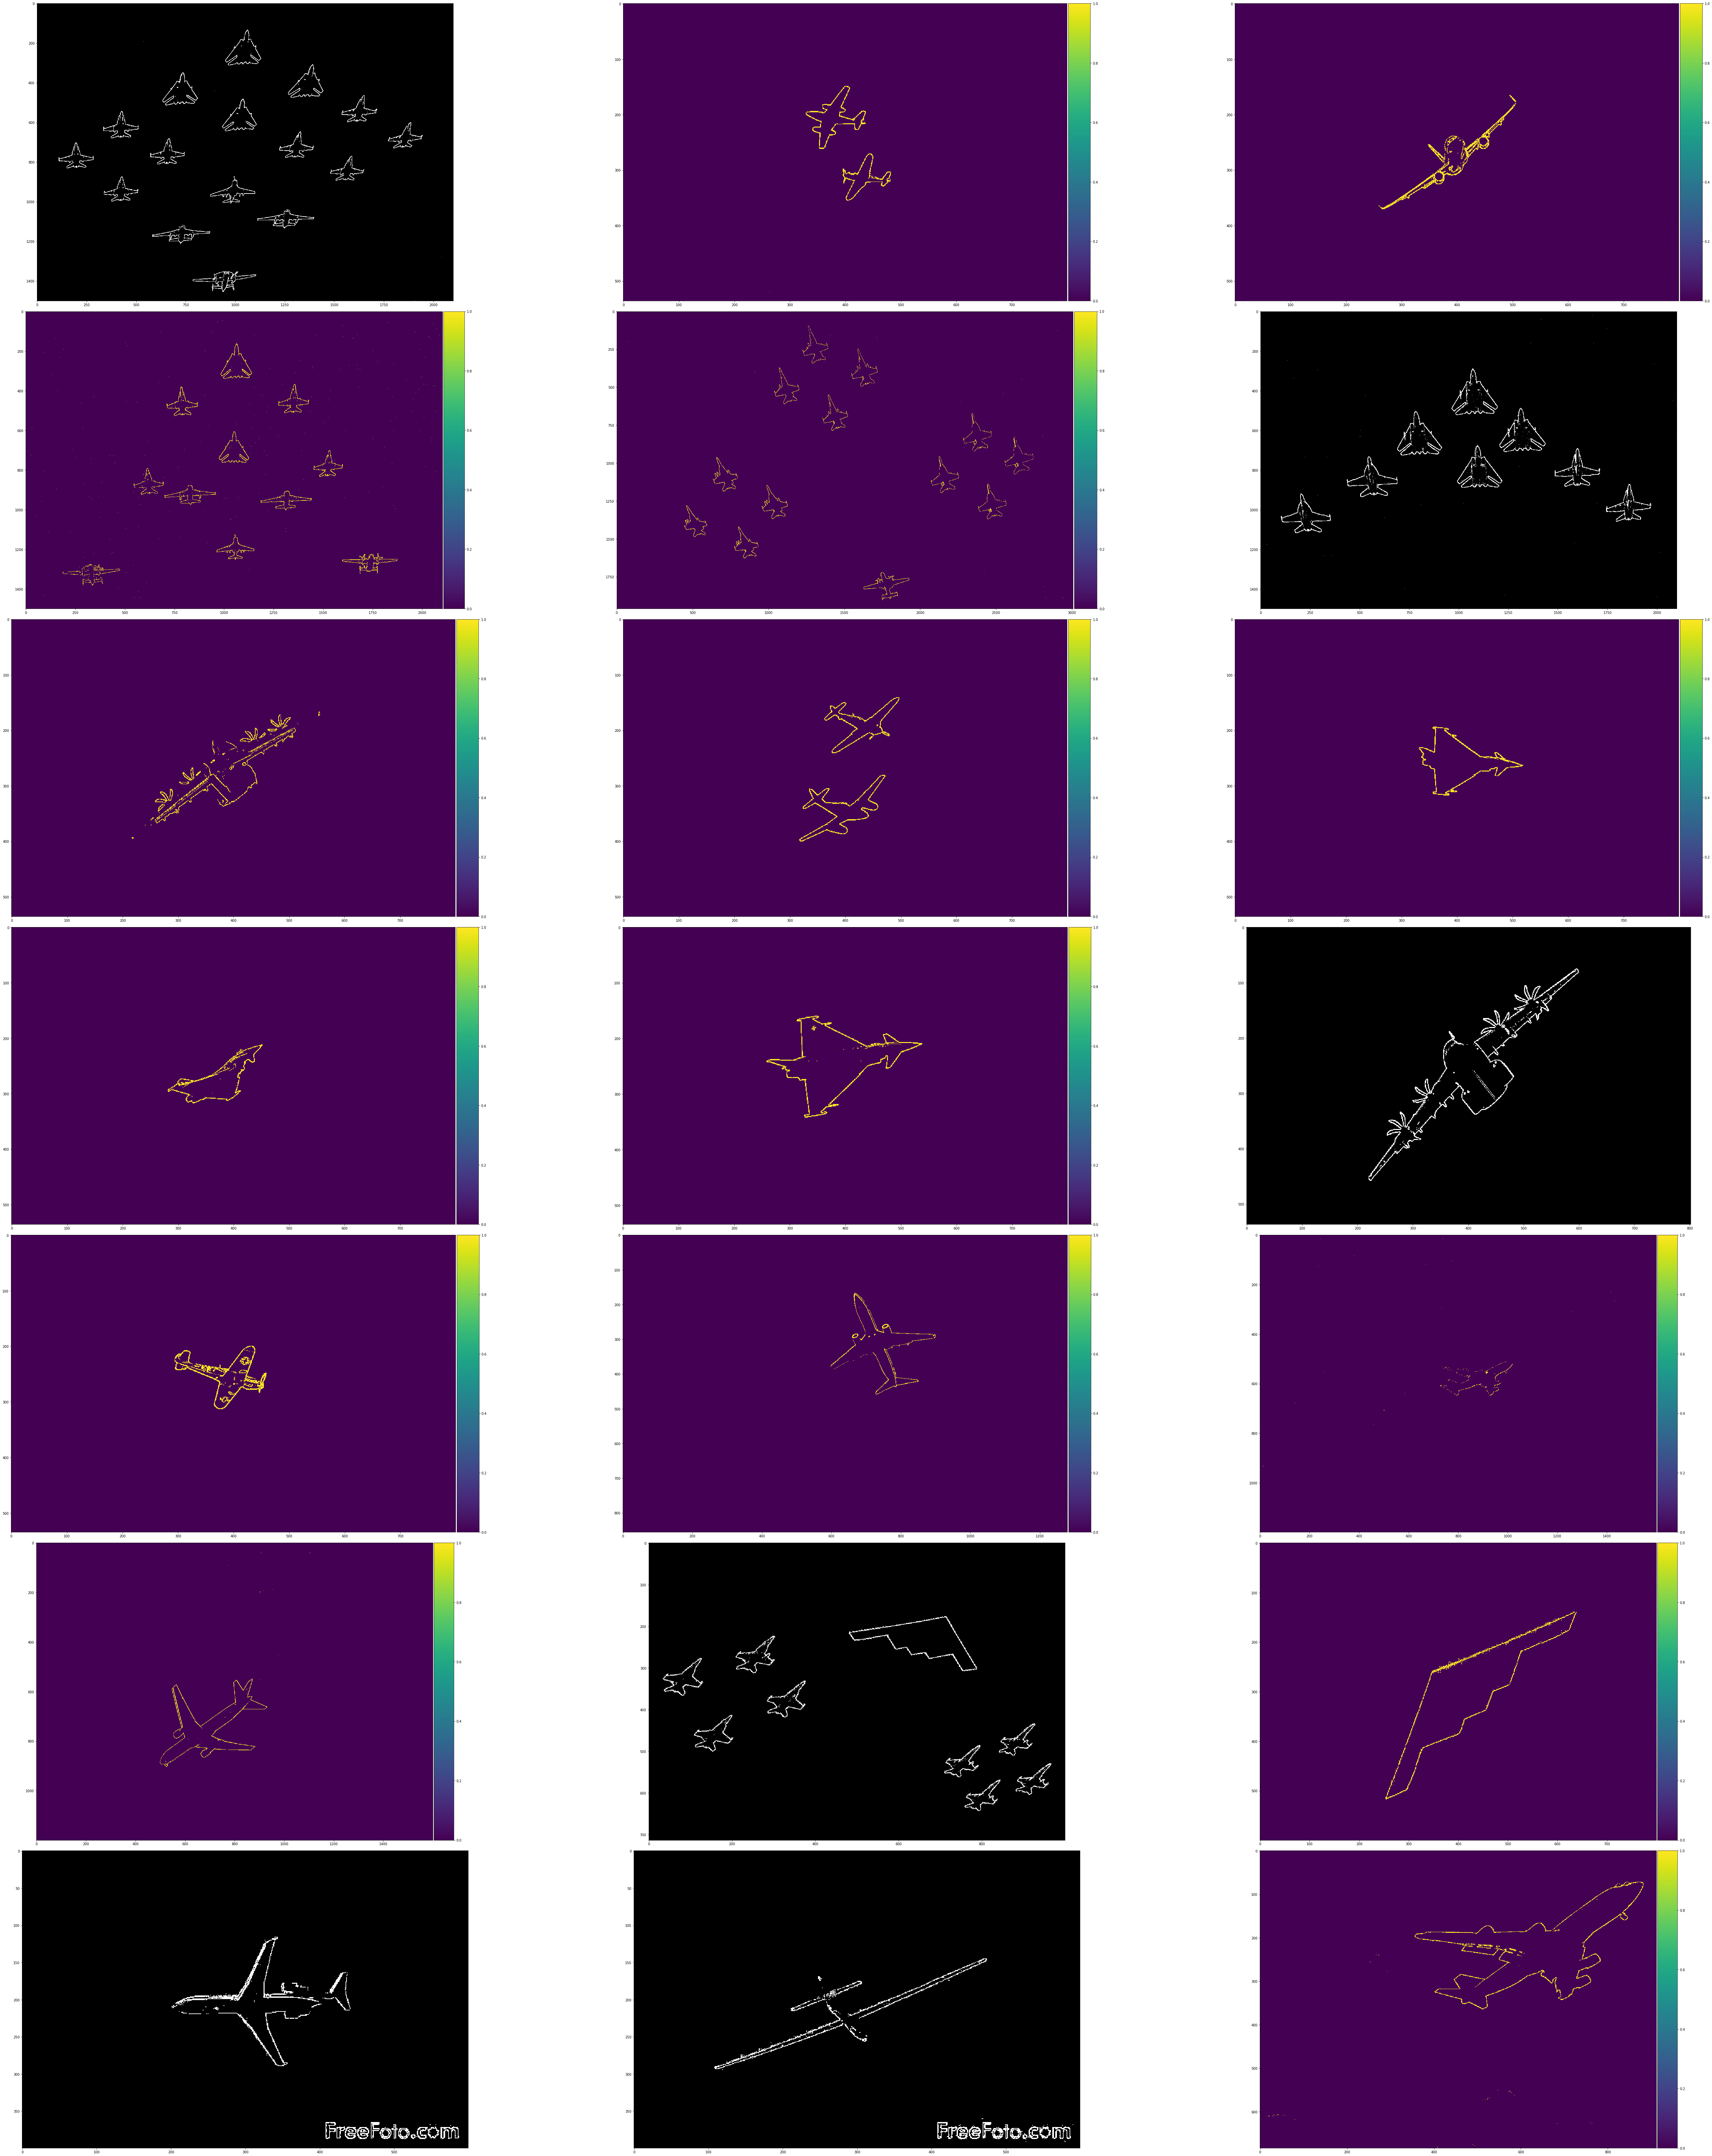

In [8]:
import os
import skimage, skimage.filters as filters, skimage.io as io
import matplotlib.pyplot as plt

plt.figure(1, (18, 18))

srcs = []
for _, _, files in os.walk('planes'):
    for file in files:
        src = io.imread('planes/' + file, as_gray = True)
        srcs.append(src)
# contrast = src**0.5
# threshold = filters.threshold_mean(src)
# src[contrast > threshold] = 1
# src[contrast < threshold] = 0
import skimage.morphology as mp

binary = []

for img in srcs:
    hor, ver = gradient(img)
    img = hor + ver
    # img = threshold(img, 70)
    img = normalize(img)
    img[img > 0.15] = 1
    img[img < 0.15] = 0

    # contrast = improve_contrast(img)
    # inverted = invert(img)
    # thresholded = multiple_step_threshold(inverted, 3)
    # contrast = improve_contrast(thresholded)
    # thresholded = multiple_step_threshold(contrast, 3)
    # contrast = improve_contrast(thresholded)
    # thresholded = mp.dilation(mp.erosion(threshholded))
    # thresholded = mp.dilation(thresholded)
    binary.append(img)
# plt.subplot(1, 2, 1)
# io.imshow(contrast)
# io.imshow(src)


# for img in binary:
#     print(img)
plot_images(binary)
